In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
import seaborn as sns

In [2]:
bank_stocks= pd.read_pickle('all_banks')

In [3]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [4]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [5]:
returns= pd.DataFrame()

In [6]:
for tick in tickers:
    returns[tick+' return']= bank_stocks[tick]['Close'].pct_change()

In [7]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


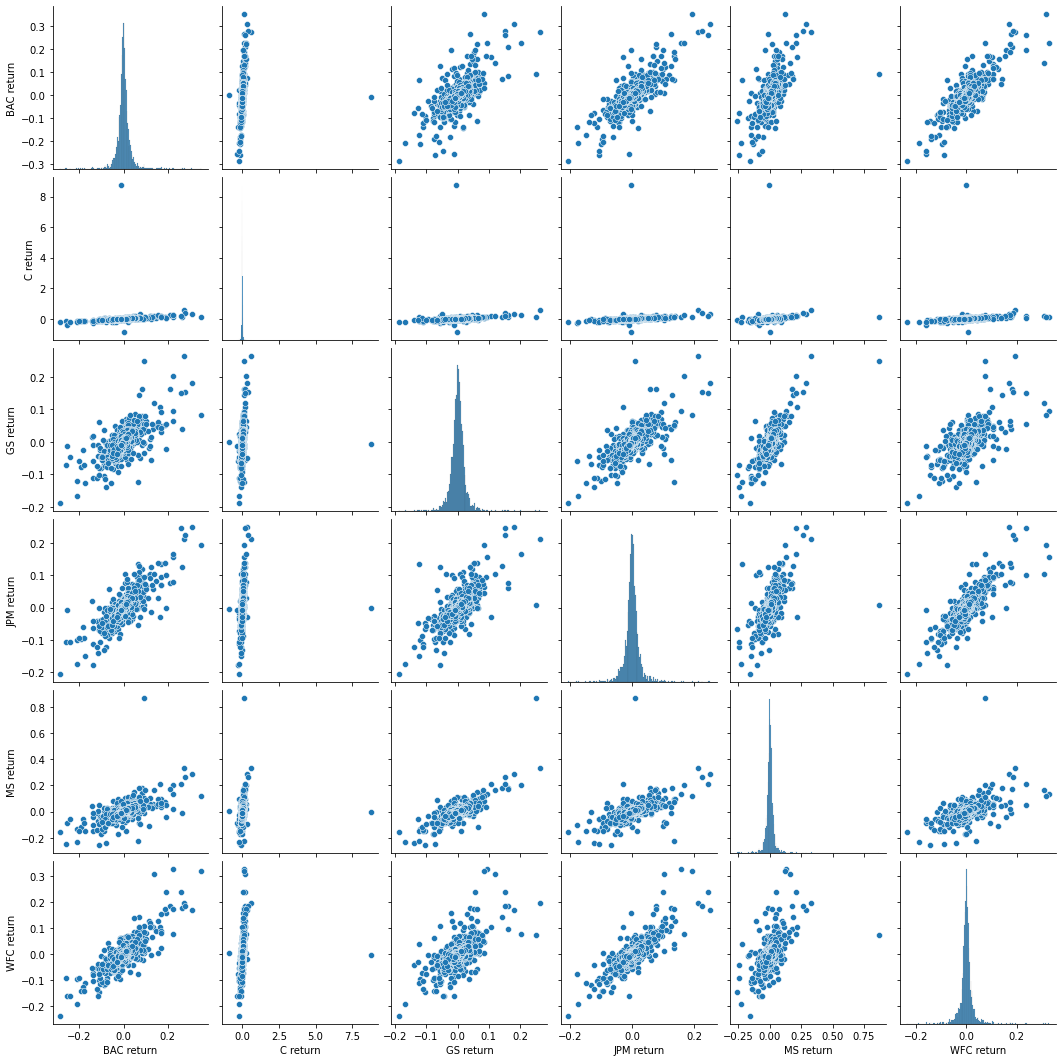

In [8]:
sns.pairplot(returns[1:])

In [9]:
returns.idxmin()

BAC return   2009-01-20
C return     2011-05-06
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [10]:
returns.idxmax()

BAC return   2009-04-09
C return     2011-05-09
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [11]:
returns.std()

BAC return    0.036650
C return      0.179969
GS return     0.025346
JPM return    0.027656
MS return     0.037820
WFC return    0.030233
dtype: float64

In [13]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

In [14]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

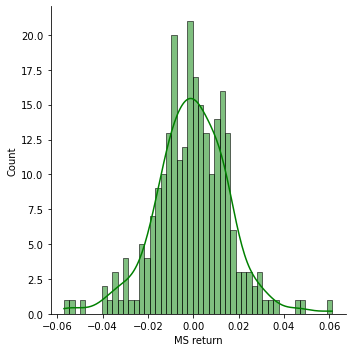

In [15]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS return'], color='green', bins=50,kde=True)

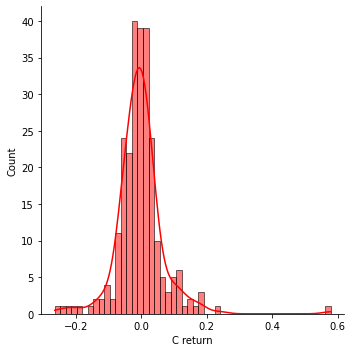

In [16]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C return'], color='red', bins=50,kde=True)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

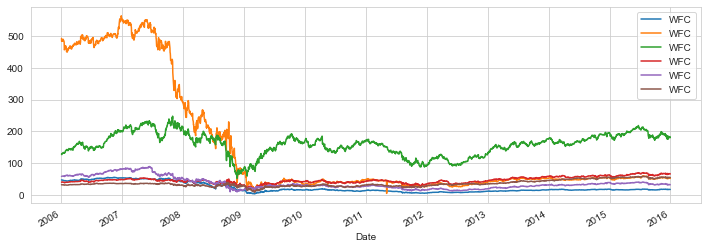

In [18]:
for ticks in tickers:
    bank_stocks[ticks]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

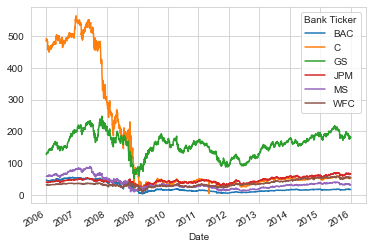

In [19]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [20]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

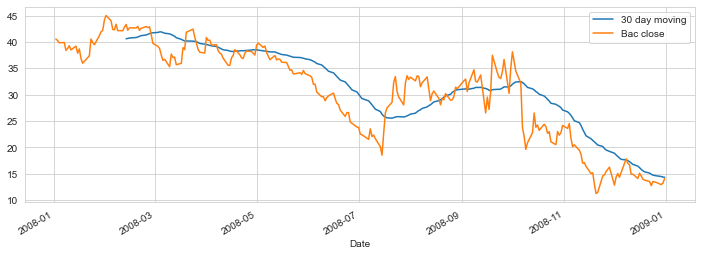

In [21]:
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01': '2009-01-01'].rolling(window=30).mean().plot(label='30 day moving')
bank_stocks['BAC']['Close'].loc['2008-01-01': '2009-01-01'].plot(label='Bac close' )
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

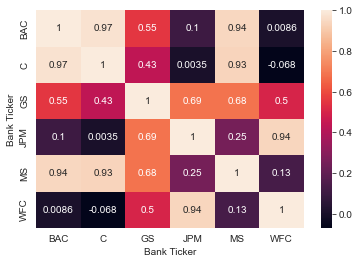

In [22]:

sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

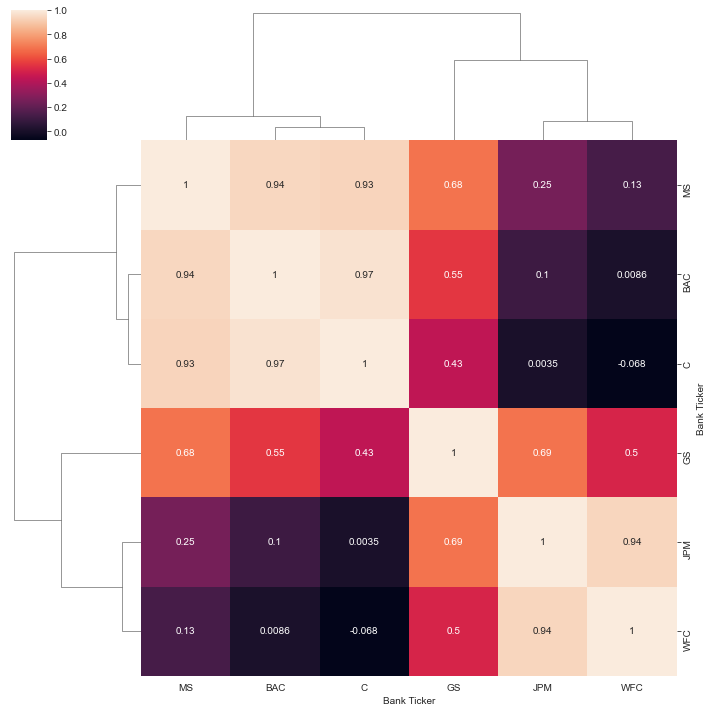

In [23]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [24]:
close_corr= bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [25]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [33]:
bac15= bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [34]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study ='sma',periods=[13,21,55])

In [35]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study ='boll')